In [1]:
import os
os.chdir("C:\\datasciencepractice")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Simple Linear Graph

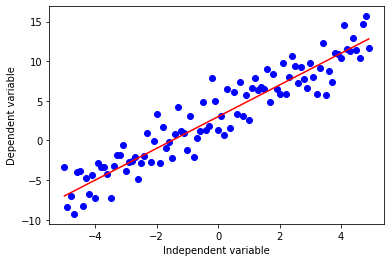

In [19]:
x=np.arange(-5.0,5.0,0.1)

y=2*(x)+3
y_noise=2*np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

# Cubic Function

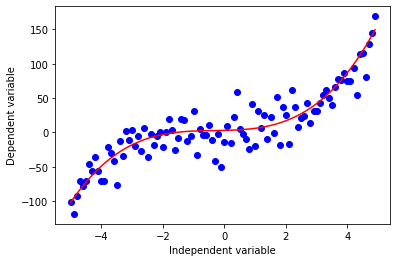

In [20]:
x=np.arange(-5.0,5.0,0.1)
y=1*(x**3)+1*(x**2)+1*(x*1)+3
y_noise=20*np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

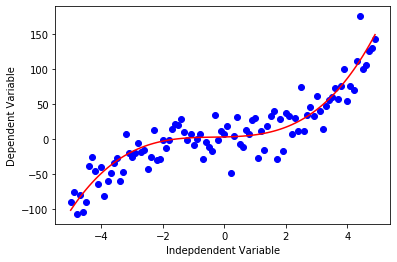

In [21]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Quadratic

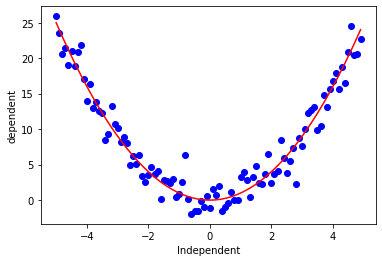

In [22]:
x=np.arange(-5.0,5.0,0.1)
y=np.power(x,2)
y_noise=2*np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent")
plt.ylabel("dependent")
plt.show()

# Exponential function

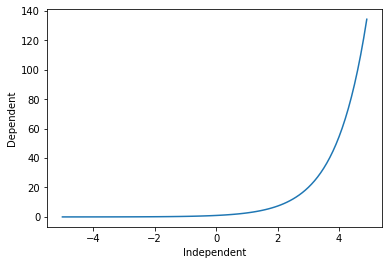

In [23]:
x=np.arange(-5.0,5.0,0.1)
y=np.exp(x)
plt.plot(x,y)
plt.xlabel("Independent")
plt.ylabel("Dependent")
plt.show()

# Logarithmatic function

C:\Users\Shulabh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


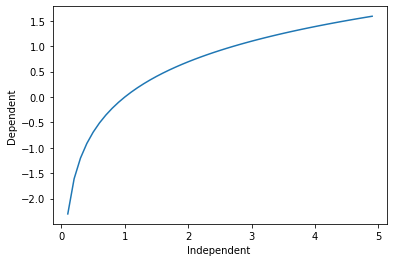

In [24]:
x=np.arange(-5.0,5.0,0.1)
y=np.log(x)
plt.plot(x,y)
plt.xlabel("Independent ")
plt.ylabel("Dependent")
plt.show()

# Logistic Function

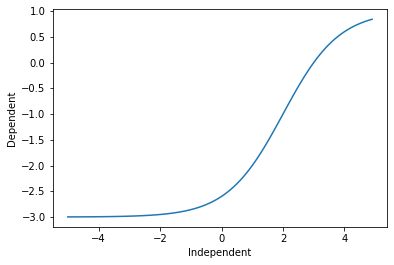

In [25]:
x=np.arange(-5.0,5.0,0.1)
y=1-4/(1+np.power(3,x-2))
plt.plot(x,y)
plt.xlabel("Independent")
plt.ylabel("Dependent")
plt.show()

# Non Linear Regression

In [29]:
df=pd.read_csv("china_gdp.csv")
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


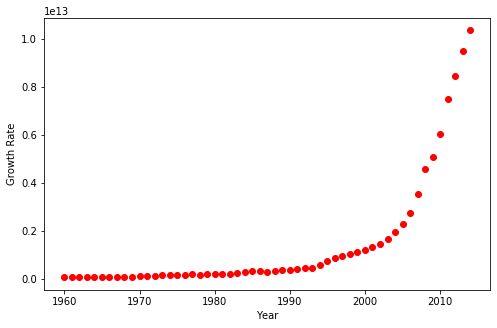

In [30]:
plt.figure(figsize=(8,5))
x_data,y_data=(df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.show()

# Building The Model

In [31]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

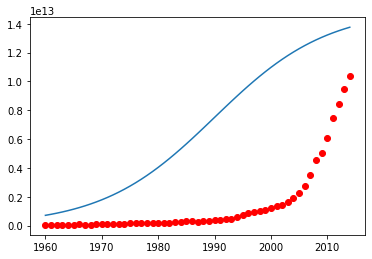

In [33]:
beta1=0.10
beta2=1990.0
y_pred=sigmoid(x_data,beta1,beta2)

plt.plot(x_data,y_pred*15000000000000)
plt.plot(x_data,y_data,'ro')
plt.show()

# Normalization Of data

In [41]:
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

In [35]:
from scipy.optimize import curve_fit
popt,popc=curve_fit(sigmoid,xdata,ydata)

print("beta_1=%f,beta_2=%f"%(popt[0],popt[1]))

beta_1=690.451711,beta_2=0.997207


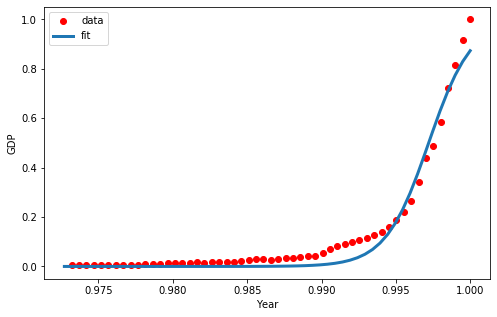

In [36]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [40]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.85
